In [1]:
#IMPORT Requisite Packages
import vaex
import matplotlib
import matplotlib.pylab as plt
import numpy as np

In [2]:
#CONFIGURE Settings
%matplotlib inline
np.warnings.filterwarnings('ignore')

In [3]:
# OPEN Input Catalog File
# Note retrieved HSC-SSP DR2 file is large (~12 GB) with filename "HSC-SSP_DR2-Rlt23.5_output.csv"
# It contains 14 columns of data and has 76,454,944 entries.
# It is necessary, therefore, to use built-in functions of vaex to convert the *.csv into *.hdf5 and
# also due to limited RAM allocation, read this file in "chunks".
# df = vaex.from_csv('HSC-SSP_DR2-Rlt23.5_output.csv', convert=True, chunk_size=5_000_000)

In [4]:
# OPEN Input Catalog HDF5 File
df = vaex.open("HSC-SSP_DR2-Rlt23.5_output.csv.hdf5")

In [6]:
# VERIFY the Catalog file in cursory fashion
df
len(df)
df.shape
df.get_column_names()

['# object_id',
 'ra',
 'dec',
 'g_cmodel_mag',
 'g_cmodel_magsigma',
 'r_cmodel_mag',
 'r_cmodel_magsigma',
 'i_cmodel_mag',
 'i_cmodel_magsigma',
 'z_cmodel_mag',
 'z_cmodel_magsigma',
 'y_cmodel_mag',
 'y_cmodel_magsigma']

In [14]:
#PERFORM basic statistics
df['r_mag'] = df.r_cmodel_mag
r_min, r_max = df.minmax(df.r_mag)
r_min, r_max

(12.675766, 24.4999981)

In [15]:
#PERFORM basic statistics
df.count(df.r_mag)

array(76454944)

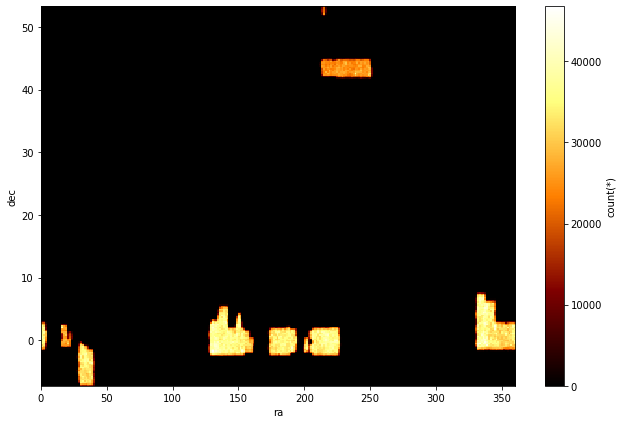

In [8]:
#PLOT Catalog Sky Density as a function of RA and DEC
df.plot("ra", "dec", figsize=(9,6)) #note plot functionality is deprecated

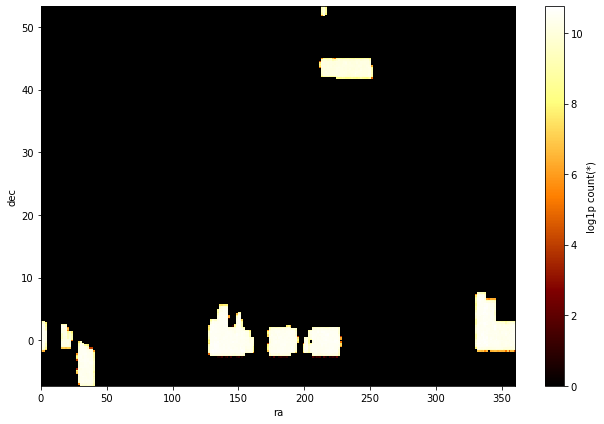

In [9]:
#PLOT Catalog Sky Density as a function of RA and DEC
df.plot("ra", "dec", f="log1p", figsize=(9,6))

In [10]:
#Generate higher-dimensional histogram
limits_ra = [0, 360]
limits_dec = [-90, 90]
counts_per_sky_element = df.count(binby=[df.ra, df.dec], limits=[limits_ra, limits_dec], shape=[400,200], progress=True)
counts_per_sky_element

[########################################] 100.00% elapsed time  :     0.19s =  0.0m =  0.0h
 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

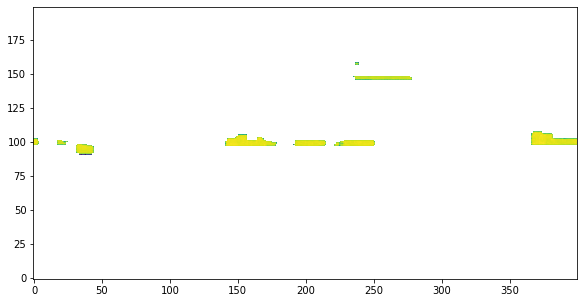

In [11]:
#VISUALIZE with Matplotlib and imshow
plt.figure(figsize=(10,5))
plt.imshow(np.log10(counts_per_sky_element).T, origin='lower')

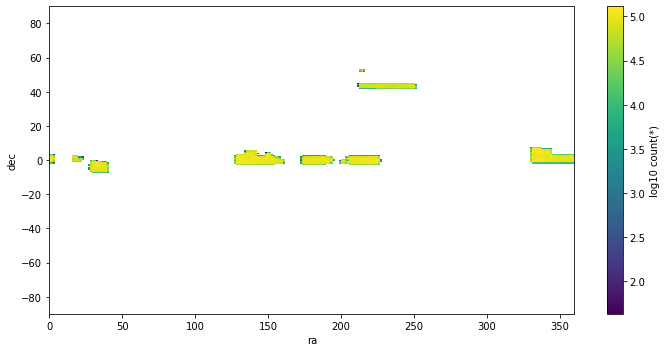

In [12]:
#VISUALIZE with bulit-in VAEX function
df.viz.heatmap(df.ra, df.dec, limits=[limits_ra, limits_dec], f='log10', colormap='viridis', figsize=(10,5))

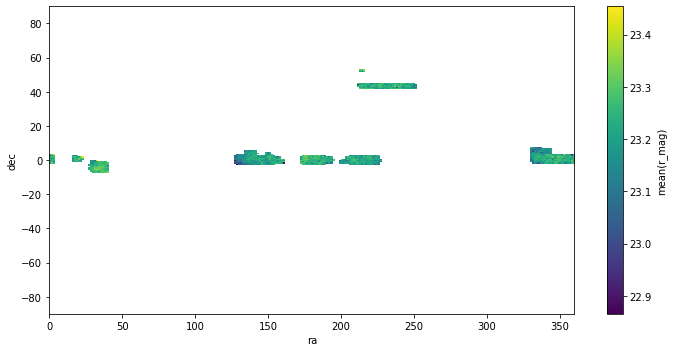

In [13]:
# PLOT as a function of mean r_magnitude and VAEX
df.viz.heatmap(df.ra, df.dec, limits=[limits_ra, limits_dec], colormap='viridis', figsize=(10,5), what=vaex.stat.mean(df.r_mag))